In [1]:
from domain.algorithm import GeneticAlgorithm
from domain.selector import SimpleSelector
from domain.stop_condition import StopConditionTime
from domain.selector import TournamentSelector
from cuttingstock import Rectangle
from domain.population import Population
from cuttingstock import CuttingStockObservation
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import copy
import math

import pandas as pd

In [2]:
MAX_TIME = 3 * 60
POPULATION_SIZE = 100
CROSS_OVER_PROBABILITY_MAX = 0.8
CROSS_OVER_PROBABILITY = 0.75
MUTATION_PROBABILITY = 0.2
MUTATION_PROBABILITY_MAX = 0.35
TOURNAMENT_SIZE = 20
ATTEMPTS = 5

In [3]:
def simple_ga(population_size, cross_over_proba, mutation_proba):
    return GeneticAlgorithm(
        StopConditionTime(MAX_TIME),
        SimpleSelector(population_size),
        cross_over_proba,
        mutation_proba)


def tournament_ga(population_size, cross_over_proba, mutation_proba):
    return GeneticAlgorithm(
        StopConditionTime(MAX_TIME),
        TournamentSelector(TOURNAMENT_SIZE, population_size),
        cross_over_proba,
        mutation_proba)

In [4]:
def fetch_rectangles(path: str):
    rects = pd.read_csv(path)
    return [Rectangle(row[1], row[0], row[2]) for _, row in rects.iterrows()]

In [5]:
def initialize_population(available_rectangles: list[Rectangle], r: float, attempts: int, population_size: int):
    return Population([CuttingStockObservation(available_rectangles, r, attempts) for _ in range(population_size)])

In [6]:
def grid_search_params(available_rectangles: list[Rectangle], r: float):
    result = {}

    for population_size in range(10, POPULATION_SIZE, 20):
        for mutation_proba in [MUTATION_PROBABILITY_MAX - 0.05 * i for i in range(3)]:
            for cross_over_proba in [CROSS_OVER_PROBABILITY_MAX - 0.05 * i for i in range(3)]:
                for attempts in range(1, 3):
                    simple = simple_ga(population_size, cross_over_proba, mutation_proba)
                    tournament = tournament_ga(population_size, cross_over_proba, mutation_proba)

                    population = initialize_population(available_rectangles, r, attempts, population_size)

                    result[(population_size, mutation_proba, cross_over_proba, attempts, "simple")] = simple.run(
                        population)[1]
                    result[
                        (population_size, mutation_proba, cross_over_proba, attempts, "tournament")] = tournament.run(
                        copy(population))[1]

    return result

In [7]:
def show_observations(observations, r: float):
    figure, axis = plt.subplots(math.ceil(len(observations) / 5), 5, figsize=(20,20))
    plt.grid(linestyle='--')

    for j in range(len(observations)):
        ax = axis[j // 5, j % 5]
        ax.set_aspect(1)
        ax.add_artist(plt.Circle((0, 0), r, color='r', fill=False))
        ax.set_xlim(-r * 1.25, r * 1.25)
        ax.set_ylim(-r * 1.25, r * 1.25)

        for rect in observations[j].rectangles:
            rect_img = patches.Rectangle((rect.x, rect.y - rect.height), rect.width, rect.height, edgecolor="b")
            ax.add_patch(rect_img)

        ax.title.set_text(observations[j].evaluate())

    plt.show()

In [8]:
data = 'data/r800.csv'
radius = 800

In [13]:
ga = simple_ga(POPULATION_SIZE, CROSS_OVER_PROBABILITY, MUTATION_PROBABILITY)
population = initialize_population(fetch_rectangles(data), radius, ATTEMPTS, POPULATION_SIZE)

In [14]:
best_obs = ga.run(population, 20)

inf
3000
4400
4440
5900
6440
8100
8100
9240
10240
10240
10540
10780
10940
11540
11540
12180
12440
12580
12980
12980
12980
13220
13620
13620
13620
13980
14020
14320
14420
14420
14420
14420
14720
15060
15060
15140
15140
15440
15440
15440
15440
15520
15560
15680
16320
16320
16320
16320
16320
16320
16320
16320
16320
16480
16560
16840
16840
16840
16840
16840
16960
16960
16960
17200
17200
17200
17200
17240
17240
17440
17440
17440
18080
18080
18080
18080
18080
18080
18080
18480
18480
18480
18480
18480
18480
18480
18480
18480
18480
18480
18480
18520
18880
18880
18880
18880
18880
18880
18920
18920
18920
18920
18920
18920
18920
18920
18960
18960
18960
19320
19320
19320
19320
19320
19320
19320
19320
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19760
19800
19800
19800
19800
19800
19800
19800
19800
19800
19800
19800
19800
19800
20160
20160
20160
20160
20160
20160
20160
20160
20160
20160
20160
20200
20200
20200
20200
20

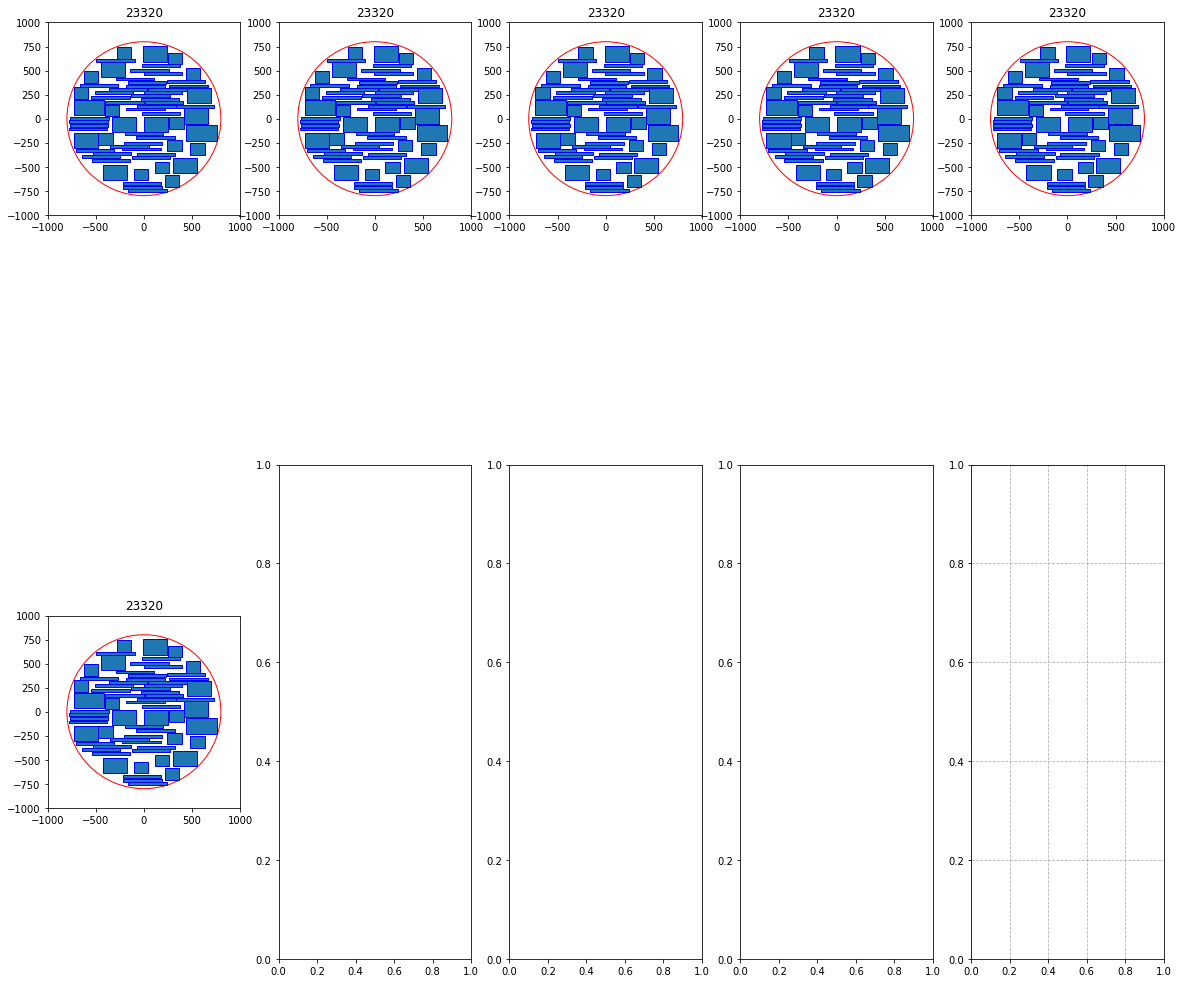

In [36]:
# for i in range(5, len(best_obs), 20):
show_observations(best_obs[481:], radius)

In [33]:
best_obs[480:]

In [32]:
best_obs